## Module/Variable/Data setup

In [1]:
%run ../src/python/helpers.py

%matplotlib inline
from numpy import nan
from numpy import arange

from pandas import read_feather
import seaborn as sns
import ipywidgets as w

#VARIABLES
cl = ['atc_1st','atc_2nd','atc_3rd','atc_4th','drug_concept_name']

data = read_feather("../data/aeolus_top5drugs.feather")

plot_settings()

## How many reports for each drug class?

In [2]:
d = dropdown(cl)
d

Dropdown(layout=Layout(display='flex', width='100%'), options=('atc_1st', 'atc_2nd', 'atc_3rd', 'atc_4th', 'dr…

In [3]:
series = freqXbyY(data,d.label,d.label).sort_values(ascending=False)

### Show a subset of subclasses?

In [4]:
m = len(series.index)
if len(series.index)>15:
    m = 15
o = w.IntSlider(min=1,max=m,step=1,value=10)
o

IntSlider(value=3, max=3, min=1)

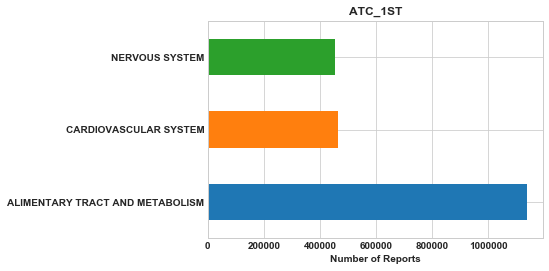

In [5]:
inds = arange(0,o.value,1)
sub_series = series.iloc[inds]
p = plot(series.iloc[inds],kind='barh')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel("")
q = p.set_xlabel("Number of Reports",weight="bold")

## subset data by chosen drug class

In [6]:
mds = w.SelectMultiple(options = series.index,value=[series.index[0]])
mds

SelectMultiple(index=(0,), options=('ALIMENTARY TRACT AND METABOLISM', 'CARDIOVASCULAR SYSTEM', 'NERVOUS SYSTE…

In [7]:
sub = data.query('{0} in @mds.label'.format(d.label))

## How many are reported across the years for the chosen drug class(es)?

In [8]:
series2 = freqXbyY(sub,'report_year',d.label)

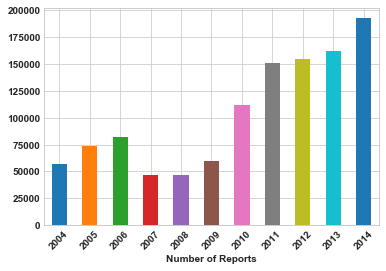

In [9]:
p = plot(series2,kind='bar')
q = p.set_ylabel(p.get_ylabel(),rotation=0)
q = p.set_xlabel("Number of Reports",weight="bold")
q = p.set_xticklabels(p.get_xticklabels(),rotation=45)

## subset data by chosen year(s)

In [10]:
labels = series2.index
mds = w.SelectMultiple(options = labels ,value = tuple(labels))
mds

SelectMultiple(index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), options=('2004', '2005', '2006', '2007', '2008', '200…

## How many are reported within this class across the sexes?

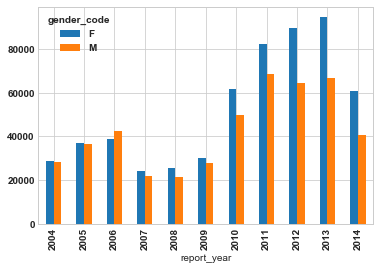

In [11]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'report_year'
count = 'id'

dat = clean_gender(sub).query('report_year in @mds.label')

#main
sub_dat = dat[[bars,x,count]]
plot_sub = sub_dat.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()

## How many are reported within this class across ages?

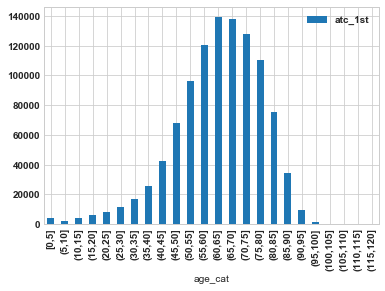

In [12]:
#plot variables for filtering/wrangling
grp = 'age_cat'

#main
dat[[d.label,grp]].groupby([grp]).count().plot.bar()

## How many are reported within this class across ages for each sex?

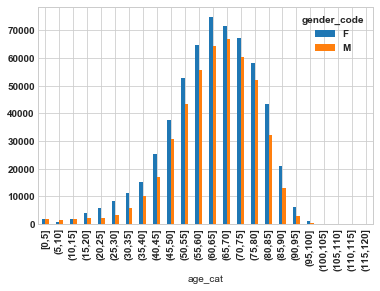

In [13]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'age_cat'
count = 'id'

#want to filter dataset for M/F gender and if report year was clicked or selected
dat = clean_gender(sub)[[bars,x,count]]

#main
plot_sub = dat.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()